# Algo Assignment 4 22k-4080

# Q5 part C

In [3]:
def word_search(grid, word):
    rows = len(grid)
    cols = len(grid[0])
    word_len = len(word)
    
    directions = [
        (0, 1),   # Right
        (0, -1),  # Left
        (1, 0),   # Down
        (-1, 0)   # Up
    ]
    
    results = []  
    
    def search_from_position(row, col, dr, dc):
        for i in range(word_len):
            new_row = row + dr * i
            new_col = col + dc * i
            if new_row < 0 or new_row >= rows or new_col < 0 or new_col >= cols or grid[new_row][new_col] != word[i]:
                return False
       
        end_row = row + dr * (word_len - 1)
        end_col = col + dc * (word_len - 1)
        results.append([(row, col), (end_row, end_col)])
        return True


    for row in range(rows):
        for col in range(cols):
            if grid[row][col] == word[0]:  # Potential starting point
                for dr, dc in directions:
                    search_from_position(row, col, dr, dc)

    return results

grid = [
    ['O', 'F', 'O', 'O', 'T'],
    ['V', 'O', 'Q', 'U', 'O'],
    ['E', 'O', 'I', 'H', 'O'],
    ['R', 'T', 'G', 'H', 'F']
]
word = "FOOT"

occurrences = word_search(grid, word)

for start, end in occurrences:
    print(f"Word found from {start} to {end}")


Word found from (0, 1) to (0, 4)
Word found from (0, 1) to (3, 1)
Word found from (3, 4) to (0, 4)


# Q6

In [8]:
import random

def generate_points(n):
    return [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(n)]


In [10]:
def quick_hull(points):
    def find_hull(points, p1, p2):
        if not points:
            return []
        # Find the point furthest from the line p1-p2
        farthest = max(points, key=lambda p: cross_product(p1, p2, p))
        hull = [farthest]
        # Divide into two subsets and recurse
        left_set = [p for p in points if cross_product(p1, farthest, p) > 0]
        right_set = [p for p in points if cross_product(farthest, p2, p) > 0]
        hull += find_hull(left_set, p1, farthest)
        hull += find_hull(right_set, farthest, p2)
        return hull

    def cross_product(p1, p2, p):
        return (p2[0] - p1[0]) * (p[1] - p1[1]) - (p2[1] - p1[1]) * (p[0] - p1[0])

    if len(points) <= 3:
        return points  # Convex hull is the points themselves

    # Find the extreme points
    min_point = min(points)
    max_point = max(points)

    left_set = [p for p in points if cross_product(min_point, max_point, p) > 0]
    right_set = [p for p in points if cross_product(max_point, min_point, p) > 0]

    return [min_point, max_point] + find_hull(left_set, min_point, max_point) + find_hull(right_set, max_point, min_point)


In [12]:
from math import atan2

def graham_scan(points):
    # Sort by polar angle
    points = sorted(points, key=lambda p: (p[0], p[1]))
    anchor = points[0]

    def polar_angle(p):
        return atan2(p[1] - anchor[1], p[0] - anchor[0])

    sorted_points = sorted(points, key=polar_angle)

    hull = []
    for p in sorted_points:
        while len(hull) >= 2 and cross_product(hull[-2], hull[-1], p) <= 0:
            hull.pop()
        hull.append(p)
    return hull

def chan_algorithm(points, m):
    def merge_hulls(hulls):
        # Efficiently merge hulls (output-sensitive)
        return ...

    groups = [points[i:i+m] for i in range(0, len(points), m)]
    hulls = [graham_scan(group) for group in groups]
    final_hull = merge_hulls(hulls)
    return final_hull


In [16]:
!pip install memory_profiler

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
def cross_product(p1, p2, p3):
    """Returns the cross product of vectors (p2 - p1) and (p3 - p1)."""
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

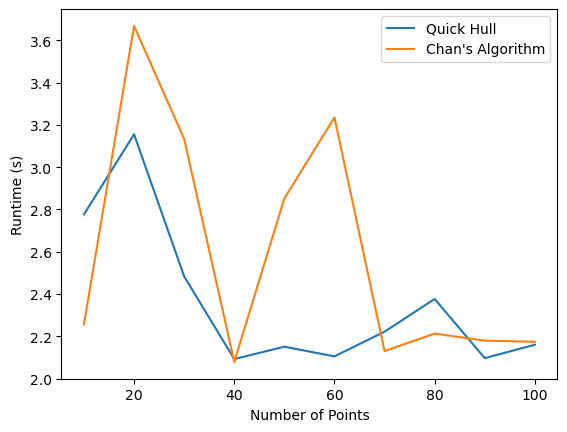

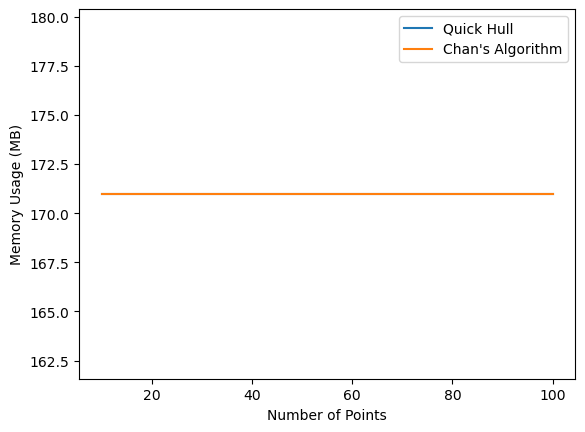

In [26]:
import math

def measure_performance(algorithm, points, *args):
    start_time = time.time()
    mem_usage = memory_usage((algorithm, (points, *args)))
    runtime = time.time() - start_time
    return runtime, max(mem_usage)

n_points = range(10, 101, 10)
quick_hull_results = []
chan_results = []

for n in n_points:
    points = generate_points(n)
    
    # Measure Quick Hull performance
    quick_hull_results.append(measure_performance(quick_hull, points))
    
    # Determine m for Chan's Algorithm
    m = math.ceil(math.sqrt(n))  # Example choice: m = sqrt(n)
    
    # Measure Chan's Algorithm performance
    chan_results.append(measure_performance(chan_algorithm, points, m))

# Extract runtime and memory usage
qh_runtime, qh_memory = zip(*quick_hull_results)
ch_runtime, ch_memory = zip(*chan_results)

# Plot runtime
plt.plot(n_points, qh_runtime, label="Quick Hull")
plt.plot(n_points, ch_runtime, label="Chan's Algorithm")
plt.xlabel("Number of Points")
plt.ylabel("Runtime (s)")
plt.legend()
plt.show()

# Plot memory usage
plt.plot(n_points, qh_memory, label="Quick Hull")
plt.plot(n_points, ch_memory, label="Chan's Algorithm")
plt.xlabel("Number of Points")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.show()
